In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df = pd.read_csv("model_data")

## Data Understanding

In [3]:
df.head()

,Time,EacToday(kWh),INVTemp(℃),AMTemp1(℃),BTTemp(℃),OUTTemp(℃),AMTemp2(℃),next_after
0,2025-03-01 06:52:01,0.0,25.3,23.9,32.3,0,23.2,NaN
1,2025-03-01 06:57:01,0.0,26.5,25.4,33.1,0,23.5,98.5
2,2025-03-01 07:02:01,0.0,27.6,27.1,34.0,0,23.9,301.0
3,2025-03-01 07:07:01,0.0,28.8,28.6,35.2,0,24.0,297.5
4,2025-03-01 07:12:01,0.0,29.8,30.0,36.0,0,24.2,302.5


In [4]:
df.describe()

,EacToday(kWh),INVTemp(℃),AMTemp1(℃),BTTemp(℃),OUTTemp(℃),AMTemp2(℃),next_after
count,4588.000000,4588.000000,4588.000000,4588.000000,4588.0,4588.000000,4587.000000
mean,266.978596,61.844006,50.509743,56.666979,0.0,46.695118,297.691411
std,198.163007,14.630597,8.820206,8.133309,0.0,10.843666,22.615001
min,0.000000,21.600000,20.400000,29.100000,0.0,18.000000,6.500000
25%,60.875000,52.200000,45.900000,51.500000,0.0,39.800000,297.500000
50%,268.100000,58.600000,49.800000,57.300000,0.0,47.700000,299.500000
75%,470.650000,75.900000,57.800000,63.300000,0.0,56.000000,302.500000
max,591.900000,88.600000,65.400000,71.600000,0.0,64.000000,479.000000


In [5]:
df = df.drop('OUTTemp(℃)', axis=1)

In [6]:
df["Time"]=pd.to_datetime(df["Time"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4588 entries, 0 to 4587
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Time           4588 non-null   datetime64[ns]
 1   EacToday(kWh)  4588 non-null   float64       
 2   INVTemp(℃)     4588 non-null   float64       
 3   AMTemp1(℃)     4588 non-null   float64       
 4   BTTemp(℃)      4588 non-null   float64       
 5   AMTemp2(℃)     4588 non-null   float64       
 6   next_after     4587 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 251.0 KB


In [8]:
df = df.dropna()

In [9]:
df.shape

(4587, 7)

## Features and target

In [10]:
X= df.drop(['Time','EacToday(kWh)','next_after'],axis=1)
y=df["EacToday(kWh)"]

## Split data for time series

In [11]:
split_ratio = 0.8  # 80% train, 20% test
split_point = int(len(df) * split_ratio)

X_train = X.iloc[:split_point]
X_test = X.iloc[split_point:]
y_train = y.iloc[:split_point]
y_test = y.iloc[split_point:]

## Normalization

In [12]:
#wont normalize them for now since all of them are in celsius

In [13]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled =scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

## Models

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network  import MLPRegressor
from xgboost import XGBRegressor

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network (MLP)": MLPRegressor(random_state=42, max_iter=1000)
}

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [17]:
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}


Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training XGBoost...
Training Support Vector Regressor...
Training K-Nearest Neighbors...
Training Neural Network (MLP)...


C:\Users\Simran\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                                MAE           MSE        RMSE        R2
Linear Regression         71.236637   7369.829828   85.847713  0.819330
Decision Tree             25.383932   2025.957639   45.010639  0.950334
Random Forest             22.713174   1161.660013   34.083134  0.971522
XGBoost                   22.619888   1280.288146   35.781114  0.968614
Support Vector Regressor  91.155944  12640.273396  112.428970  0.690126
K-Nearest Neighbors       22.077865   1101.105709   33.182913  0.973007
Neural Network (MLP)      56.120152   5270.756975   72.599979  0.870788


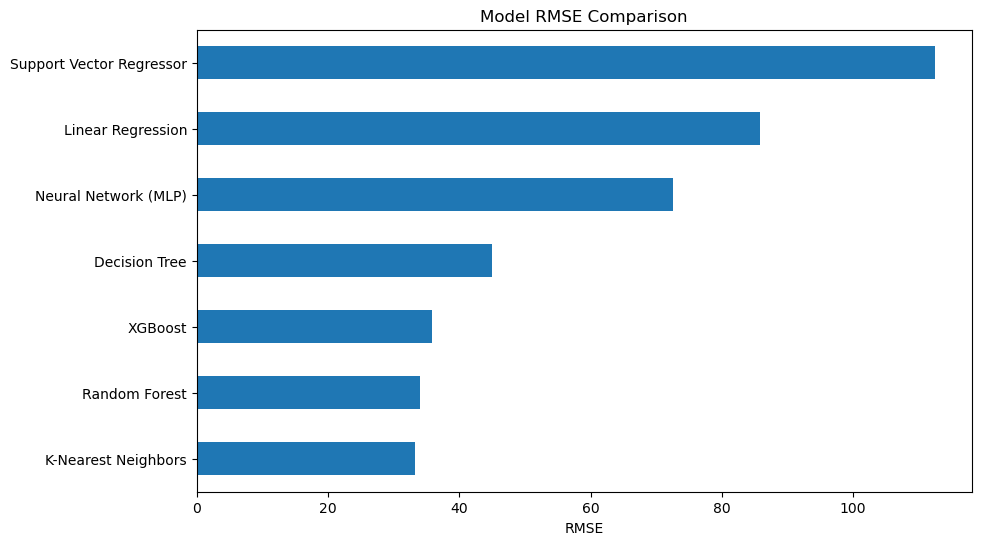

In [19]:
results_df['RMSE'].sort_values().plot(kind='barh', title="Model RMSE Comparison", figsize=(10,6))
plt.xlabel("RMSE")
plt.show()